<center>

# **CLOUD WORDS- WORDS FREQUENCY**

</center>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the data columns types
dtypes = {
    "tweet_id": "object",
    "tweet_text":"str",
    "tweet_possibly_sensitive": "object",
    "tweet_text": "object",
    "tweet_source": "object",
    "tweet_lang": "object",
    "tweet_retweet_count": "object",
    "tweet_reply_count":"object",
    "tweet_like_count": "object",
    "tweet_quote_count": "object",
    "tweet_impression_count": "object",
    "user_id":"object",
    "user_username": "object",
    "user_verified":"object",
    "user_protected":"object",
    "user_description":"object",
    "user_profile_image_url":"object",
    "user_location":"object",
    "user_followers_count":"object",
    "user_friends_count":"object",
    "user_tweet_count":"object",
    "place_id":"object",
    "place_name": "object",
    "place_full_name":"object",
    "place_country":"object",
    "place_country_code":"object",
    "place_type":"object",
    "clean_text":"object"
}

## Separate periods

Se can upload the separate files to create the histograms for each period.

In [ ]:
#Set path for files
files_path        = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/4.LIWC_Analysis/Results/'

In [ ]:
wildfire_name = 'Tubbs'
output_name1  = 'LIWC2015_Resutls_TubbsFire.csv'

In [ ]:
# Load the CSV file into a Pandas DataFrame
df1 = pd.read_csv(os.path.join(files_path, output_name1),dtype=dtypes)
df1.rename(columns={'C': 'clean_text'}, inplace=True)
print(df1.shape)

## **Figure 1. Word Cloud per period.**

In [ ]:
def WordCloud_function(df,wildfire_name):
  # Concatenate all the texts in the "clean_text" column into one string
  all_text = " ".join(df['clean_text'].values.astype(str))

  # Generate a word cloud image
  wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_text)

  # Display the generated image
  plt.figure(figsize=(5, 5), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")

  ##save figures
  figure_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/'
  figure_name = 'WordCloud_'+ wildfire_name


  # Save the figure as a PDF
  output_file = os.path.join(figure_path,figure_name)
  plt.savefig(output_file,format='pdf')


  plt.tight_layout(pad=0)


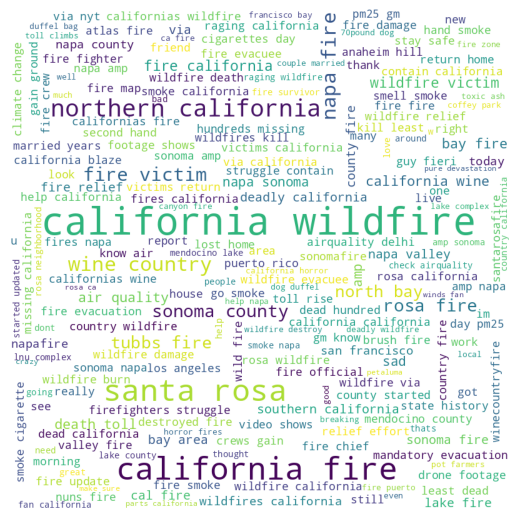

In [ ]:
Tubbs_WordCloud =WordCloud_function(df1, 'Tubbs')


## Word Frequency

In [ ]:
#This function create a excel file with each word and the frequency it appears in the tweets

def WordFreq_excel(df,wildfire_name):
  # Create a list to store all the words
  all_words = []

  # Iterate over each row in the 'tokens' column
  for i in range(len(df)):
    words = df['clean_text'][i].split()
    all_words.extend(words)  # Extend the list with the words in the current token

  # Create a DataFrame to store the word frequencies
  word_freq_df = pd.DataFrame({'Word': all_words})

  # Calculate the frequency of each word
  word_freq = word_freq_df['Word'].value_counts().reset_index()

  # Rename the columns
  word_freq.columns = ['Word', 'Frequency']


  # Save the DataFrame to an Excel file
  file_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/3.SentimentAnalysis/Results'
  file_name = 'WordFreq_' + wildfire_name + '.xlsx'
  output_file = os.path.join(file_path, file_name)

  word_freq.to_excel(output_file, index=False)
  word_freq.head(5)
  return(word_freq)

In [ ]:
df_Tubbs     = WordFreq_excel(df1,'Tubss')

In [ ]:
#Filter the 10 most frequent words
word_freq_20_Tubbs = df_Tubbs[0:10]

,Word,Frequency
0,fire,51859
1,california,44823
2,wildfire,18755
3,wildfires,13565
4,napa,11920
5,fires,10699
6,santa,10163
7,rosa,9509
8,smoke,8991
9,sonoma,8619


## List of words
Upload the file created in LIWC with the differen word categories

In [ ]:
def LIWC_CategorizeWordFile_function():
  file_path_liwc = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/4.LIWC_Analysis/CategorizedWords'
  file_name_liwc = 'TubbsFire_Categoraize_Words.xlsx'

  # Create the full file path
  file_full_path = os.path.join(file_path_liwc, file_name_liwc)

  dtypes = {'ColumnName': object}  # Replace 'ColumnName' with the actual column name
  liwc_words = pd.read_excel(file_full_path, dtype=dtypes)

  liwc_words.head(5)
  return(liwc_words)

In [ ]:
def LIWC_StressWords_function(wildfire_name):
  file_path_liwc = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/4.LIWC_Analysis/CategorizedWords'
  file_name_liwc = wildfire_name + 'Fire_stress_words.xlsx'

  # Create the full file path
  file_full_path = os.path.join(file_path_liwc, file_name_liwc)

  # Read the Excel file into a DataFrame
  liwc_stress_words = pd.read_excel(file_full_path)
  return(liwc_stress_words)

In [ ]:
Tubbs_liwc_words = LIWC_CategorizeWordFile_function()

In [ ]:
Tubbs_liwc_stress_words  = LIWC_StressWords_function("Tubbs")

In [ ]:
def TotalWordsCategory_function(df,liwc_words,liwc_words_stress):
  # Filter rows where 'anx' column is not NaN
  anx_words      = liwc_words[liwc_words['anx'].notna()]
  anger_words    = liwc_words[liwc_words['anger'].notna()]
  sad_words      = liwc_words[liwc_words['sad'].notna()]
  stress_words   = liwc_words_stress[liwc_words_stress['stress'].notna()]
  swear_words    = liwc_words[liwc_words['swear'].notna()]
  health_words   = liwc_words[liwc_words['health'].notna()]
  insights_words = liwc_words[liwc_words['insight'].notna()]

  print('Total anxiety words', len(anx_words))
  print('Total anger words',   len(anger_words))
  print('Total sad words',     len(sad_words))
  print('Total stress words',  len(stress_words))
  print('Total swear words',   len(swear_words))
  print('Total health words',  len(health_words))
  print('Total insights words',len(insights_words))

  # Words to count
  anx_target_words      = anx_words['Word']
  anger_target_words    = anger_words['Word']
  sad_target_words      = sad_words['Word']
  stress_target_words   = stress_words['Word']
  swear_target_words    = swear_words['Word']
  health_target_words   = health_words['Word']
  insights_target_words = insights_words['Word']

  # Filter and count the frequency of target words
  anx_word_counts      = df['clean_text'].str.extractall('(' + '|'.join(anx_target_words) + ')')[0].value_counts()
  anger_word_counts    = df['clean_text'].str.extractall('(' + '|'.join(anger_target_words) + ')')[0].value_counts()
  sad_word_counts      = df['clean_text'].str.extractall('(' + '|'.join(sad_target_words) + ')')[0].value_counts()
  stress_word_counts   = df['clean_text'].str.extractall('(' + '|'.join(stress_target_words) + ')')[0].value_counts()
  swear_word_counts    = df['clean_text'].str.extractall('(' + '|'.join(swear_target_words) + ')')[0].value_counts()
  health_word_counts   = df['clean_text'].str.extractall('(' + '|'.join(health_target_words) + ')')[0].value_counts()
  insights_word_counts = df['clean_text'].str.extractall('(' + '|'.join(insights_target_words) + ')')[0].value_counts()

  anx_word_counts_20      = anx_word_counts[0:10].sort_values(ascending=True)
  anger_word_counts_20    = anger_word_counts[0:10].sort_values(ascending=True)
  sad_word_counts_20      = sad_word_counts[0:10].sort_values(ascending=True)
  stress_word_counts_20   = stress_word_counts[0:10].sort_values(ascending=True)
  swear_word_counts_20    = swear_word_counts[0:10].sort_values(ascending=True)
  health_word_counts_20   = health_word_counts[0:10].sort_values(ascending=True)
  insights_word_counts_20 = insights_word_counts[0:10].sort_values(ascending=True)

  return(anx_word_counts_20,anger_word_counts_20,sad_word_counts_20,stress_word_counts_20, health_word_counts_20,swear_word_counts_20,insights_word_counts_20)

In [ ]:
def WordFreq_Plot(wildfire_name, anx_word_counts_20,anger_word_counts_20,sad_word_counts_20,stress_word_counts_20,health_word_counts_20):
# Create a figure with five subplots
  fig, axs = plt.subplots(1, 5, figsize=(20, 8))

  # Plotting anx_word_counts_20
  axs[0].barh(anx_word_counts_20.index, anx_word_counts_20.values)
  axs[0].set_title('Anxiety', fontsize=20)
  axs[0].tick_params(axis='y', labelsize=20)  # Set the font size of y-axis tick labels
  axs[0].tick_params(axis='x', labelsize=14)  # Set the font size of y-axis tick labels


  # Plotting anger_word_counts_20
  axs[1].barh(anger_word_counts_20.index, anger_word_counts_20.values)
  axs[1].set_title('Anger',fontsize=20)
  axs[1].tick_params(axis='y', labelsize=20)  # Set the font size of y-axis tick labels
  axs[1].tick_params(axis='x', labelsize=14)  # Set the font size of y-axis tick labels


  # Plotting sad_word_counts_20
  axs[2].barh(sad_word_counts_20.index, sad_word_counts_20.values)
  axs[2].set_title('Sadness',fontsize=20)
  axs[2].tick_params(axis='y', labelsize=20)  # Set the font size of y-axis tick labels
  axs[2].tick_params(axis='x', labelsize=14)  # Set the font size of y-axis tick labels


   # Plotting stress_word_counts_20
  axs[3].barh(stress_word_counts_20.index, stress_word_counts_20.values)
  axs[3].set_title('Stress',fontsize=20)
  axs[3].tick_params(axis='y', labelsize=20)  # Set the font size of y-axis tick labels
  axs[3].tick_params(axis='x', labelsize=14)  # Set the font size of y-axis tick labels



  # Plotting health_word_counts_20
  axs[4].barh(health_word_counts_20.index, health_word_counts_20.values)
  axs[4].set_title('Health',fontsize=20)
  axs[4].tick_params(axis='y', labelsize=20)  # Set the font size of y-axis tick labels
  axs[4].tick_params(axis='x', labelsize=14)  # Set the font size of y-axis tick labels


  # Adjust the spacing between subplots
  plt.tight_layout()


  ##save figures
  figure_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/'
  figure_name = 'WordFrequency'+ wildfire_name


  # Save the figure as a PDF
  output_file = os.path.join(figure_path,figure_name)
  plt.savefig(output_file,format='pdf')

  # Display the figure
  plt.show()


## **Tubbs Fire**

In [ ]:
anx_words_Tubbs,anger_words_Tubbs,sad_words_Tubbs, stress_words_Tubbs,health_words_Tubbs,swear_words_Tubbs,insights_words_Tubbs = TotalWordsCategory_function(df1, Tubbs_liwc_words,Tubbs_liwc_stress_words)

In [ ]:
type(anx_words_Tubbs)

pandas.core.series.Series

In [ ]:
df_most_freq_words = {
    "Anxiety"    : anx_words_Tubbs.index,
    "Anx_freq"   : anx_words_Tubbs.values,
    "Anger"      : anger_words_Tubbs.index,
    "Anger_freq" : anger_words_Tubbs.values,
    "Sadness"    : sad_words_Tubbs.index,
    "Sad_freq"   : sad_words_Tubbs.values,
    "Stress"     : stress_words_Tubbs.index,
    "Stress_freq": stress_words_Tubbs.values,
    "Health"     : health_words_Tubbs.index,
    "Health_freq": health_words_Tubbs.values,

  }

# Create a DataFrame using the data dictionary
df = pd.DataFrame(df_most_freq_words)

excel_filename = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/3.SentimentAnalysis/MostFreqWords.xlsx'
df.to_excel(excel_filename, index=False)

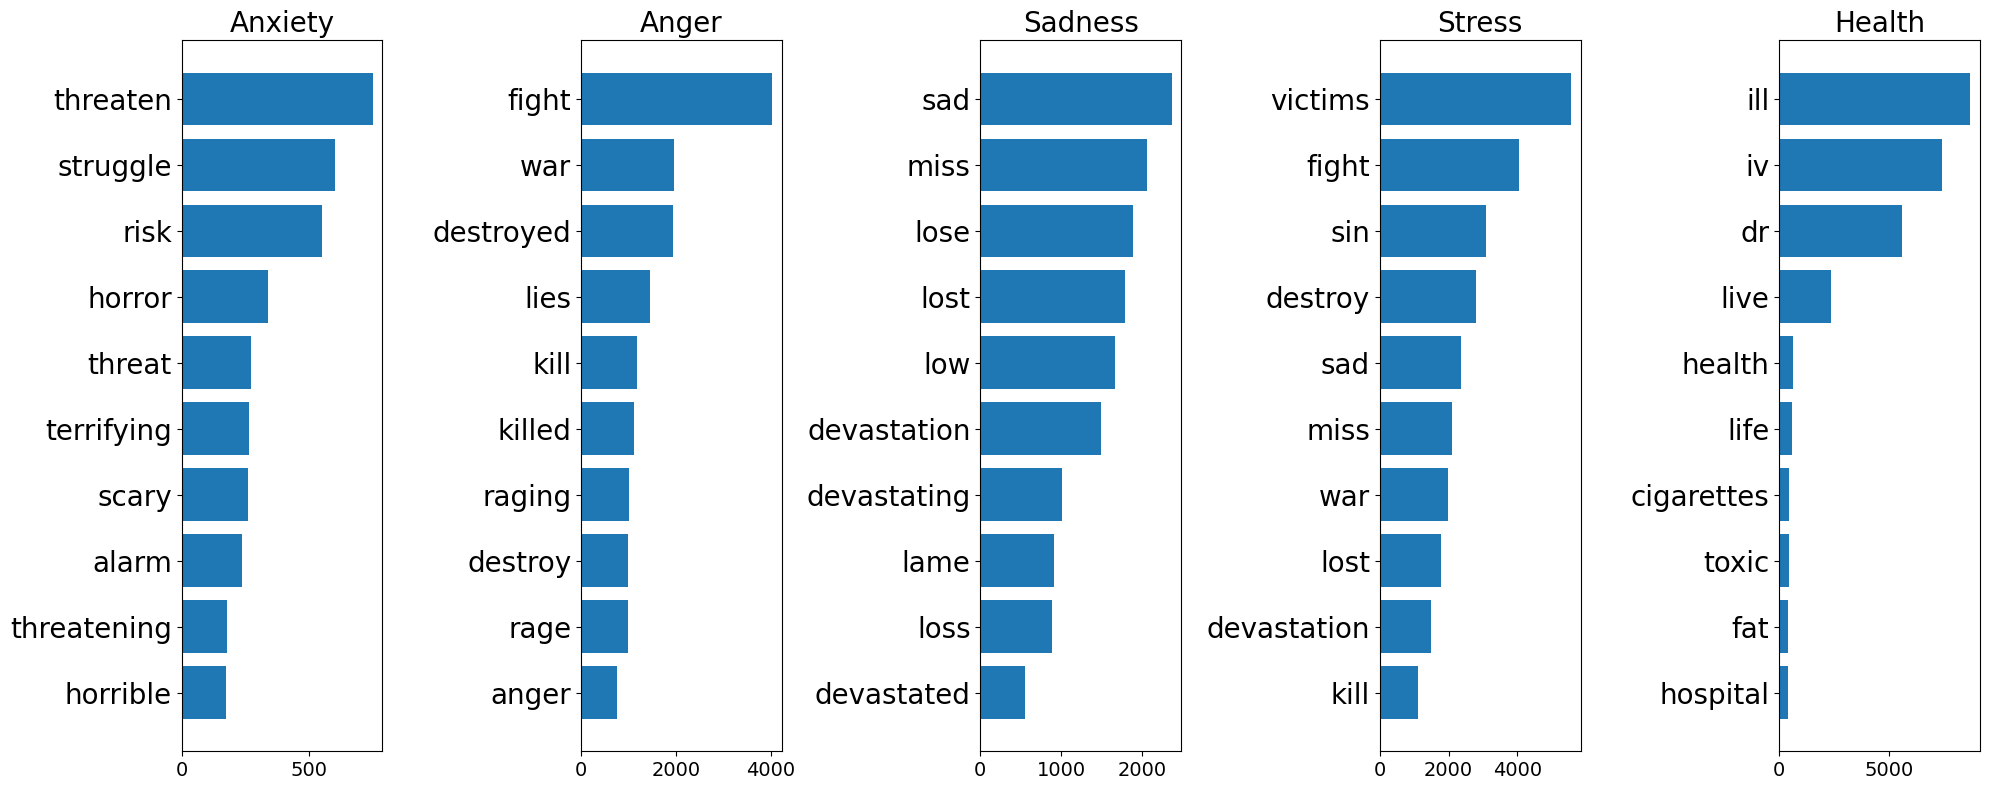

In [ ]:
WordFreq_Plot('Tubbs',anx_words_Tubbs,anger_words_Tubbs,sad_words_Tubbs,stress_words_Tubbs,health_words_Tubbs)

**This code:** is to save a list of words to create the co-occurrence words

In [ ]:
Tubbs_list_words = [anx_words_Tubbs.index,anger_words_Tubbs.index, sad_words_Tubbs.index,stress_words_Tubbs.index]

# Create an empty set to store the unique words
unique_words = set()

# Iterate over the lists of words in Tubbs_list_words
for word_list in Tubbs_list_words:
    unique_words.update(word_list)

# Convert the set to a list
unique_word_list = list(unique_words)

file_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Data/Tubbs_MH_Words.txt'

# Open the file in write mode
with open(file_path, "w") as file:
    # Write each word on a new line
    for word in unique_word_list:
        file.write(word + "\n")

